# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


## BUSINESS OVERVIEW INTRODUCTION
Zillow is a leading online real estate marketplace that provides valuable services and tools for home buyers, sellers, renters, and real estate professionals. 

The real estate investment firm is seeking to leverage data-driven insights to identify the best zip codes for real estate investment. The firm aims to make strategic investment decisions based on accurate forecasts of future real estate prices. By investing in the right locations, the company intends to maximize profitability and mitigate risk. The goal is to provide clients with attractive investment opportunities and generate sustainable returns.

We will be forecasting real estate prices of various zip codes using data from Zillow Research. The Zillow real-estate investment firm has tasked us with finding out which zip codes align with the investment firm's objectives and strategy.


### CHALLENGES
- In conducting the analysis, we had to determine how to best go about it given the ambiguity of the data. Finding out what would be the best method to go about the project in order to garner the best results. The major challenges were whether to direct the results towards maximizing profit, minimizing loss and risk and what time horizon would best fit for the project

- Model Selection and Performance Evaluation:

Selecting an appropriate time series forecasting model can be challenging due to the diverse nature of real estate data. There are several models available, such as ARIMA, SARIMA, Prophet, or machine learning algorithms, each with their strengths and limitations. Determining the most suitable model and optimizing its performance requires careful consideration and thorough evaluation using appropriate evaluation metrics.

### PROBLEM STATEMENT
*The firm wants to maximize profitability while considering the associated risks and the time horizon for the investment.*

### OBJECTIVES
The objective of this project is:

1. To provide a recommendation for the top 5 best zip codes for a real estate investment firm to invest in.

2. What are the historical trends and patterns in real estate prices for different zip codes?

3. What are the key factors that influence real estate prices in each zip code?

4. How do different zip codes compare in terms of risk and return on investment?

#### DATA
This dataset was obtained from [Zillow Research](https://www.zillow.com/research/data/). The dataset was from 1996- 2018. It has 14273 rows and 272 columns.

#### RECORDING THE EXPERIMENTAL DESIGN
* Data Exploration: Begin by exploring the provided dataset, zillow_data.csv, to gain insights into the real estate market. Understand the variables, their meanings, and the structure of the data. This exploration will guide the selection of predictors for real estate price forecasting.

* Definition of "Best Investment": Clarify the investment firm's objectives, risk tolerance, and investment strategy. Consider the desired profitability, time horizon, and any specific constraints or preferences. This definition will guide the selection of evaluation metrics and the criteria for identifying the top 5 zip codes.

* Data Preprocessing and Feature Engineering: Clean the dataset, handle missing values, and preprocess the features for modeling. Explore the possibility of incorporating external data sources, such as economic indicators or demographic data, to enhance the forecasting models. Feature engineering techniques may be applied to extract meaningful information from the available variables.

* Time Series Modeling: Select an appropriate time series forecasting model based on the characteristics of the data and the defined objectives. Popular models for time series forecasting include ARIMA, SARIMA, Prophet, or machine learning algorithms like LSTM or XGBoost. Train the chosen model using historical real estate price data.

* Model Evaluation: Evaluate the performance of the time series model using appropriate metrics, such as mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE). Compare the model's accuracy against baseline models or other approaches to assess its effectiveness in predicting real estate prices.

* Risk Assessment: Assess the risk associated with each zip code by analyzing historical price volatility, market trends, and external factors that may impact the real estate market. Consider factors such as economic stability, population growth, crime rates, and the availability of amenities. Quantify the risk using suitable risk evaluation techniques.

* Final Recommendation: Synthesize the findings from the risk assessment, return on investment and model performance to make a recommendation on the top 5 best zip codes for investment. Present a rationale that incorporates key insights from the data analysis and supports the recommendation with quantitative and qualitative justifications.


### The Metrics of success include:

* ROI (Return on Investment) from Initial to Final House Price. This helps measure for profitability of a venture and in this case the best zipcodes to invest in. The higher the ROI the better the as it compares favorably to the cost 
* Risk Assessment. Quantify and evaluate the risk associated with each recommended zip code. This can be done by considering metrics such as historical price volatility from the values, market stability based on trends, as well as risk indicators also from trends. A successful recommendation should consider a balanced risk profile while maximizing potential returns.

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [38]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter

In [39]:
#loading the dataset
data=pd.read_csv('zillow_data.csv')
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [40]:
#checking columns
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [41]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")
# print the shape of our dataset
print_dataset_shape(data)

Dataset 1 - Number of rows: 14723
Dataset 1 - Number of columns: 272


In [42]:
#getting the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [43]:
data.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [44]:
# ROI(Return On Investment)
data['ROI'] = ((data['2018-04'] - data['1996-04']) / data['1996-04']) * 100

In [45]:
# Return on Investment after 2008 Housing Crash
data['ROI2'] = ((data['2018-04'] - data['2012-01']) / data['2012-01']) * 100

In [46]:
# Coefficient of Variation

# Calculating STD for CV
data['std'] = data.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1)

# Calculating Mean for CV
data['mean'] = data.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)

# Calculating CV
data['CV'] = data['std']/data['mean']

# Dropping std and mean
data.drop(['std', 'mean'], inplace=True, axis=1)

In [47]:

# Calculate historical price volatility (standard deviation) for each zip code
data['Volatility'] = data.loc[:, '1996-04':'2018-04'].std(axis=1)

# Calculate market stability (average price growth) for each zip code
data['Market Stability'] = data.loc[:, '1996-04':'2018-04'].apply(lambda row: np.mean(np.diff(row)), axis=1)

# Calculate other risk indicators based on your analysis requirements
data['Risk Indicator 1'] = data['Volatility'] / data['Market Stability']
data['Risk Indicator 2'] = data['Volatility'] / data['Market Stability']
# Add more risk indicators as needed

# Create a new DataFrame with market stability and risk indicators
risk_df = pd.DataFrame()
risk_df['Market Stability'] = data['Market Stability']
risk_df['Risk Indicator 1'] = data['Risk Indicator 1']
risk_df['Risk Indicator 2'] = data['Risk Indicator 2']
# Add more risk indicators as needed

# Print the new DataFrame
print(risk_df)

       Market Stability  Risk Indicator 1  Risk Indicator 2
0           2637.878788         72.338845         72.338845
1            326.136364        102.831531        102.831531
2            452.651515         83.355060         83.355060
3           3064.015152         75.465013         75.465013
4            167.424242        108.509251        108.509251
...                 ...               ...               ...
14718        434.469697         88.410375         88.410375
14719        504.166667         97.781951         97.781951
14720        289.015152         61.492708         61.492708
14721       1792.803030         76.159109         76.159109
14722        684.848485        122.164315        122.164315

[14723 rows x 3 columns]


In [48]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2018-02', '2018-03', '2018-04', 'ROI', 'ROI2', 'CV', 'Volatility',
       'Market Stability', 'Risk Indicator 1', 'Risk Indicator 2'],
      dtype='object', length=279)

# Step 2: Data Preprocessing

In [49]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

#### Checking for duplicates

In [50]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    """
    This function checks for and returns any duplicates in a given dataframe.
    """
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(data)

No duplicates found in the dataset


#### Checking for missing values

In [51]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = ((missing_values / len(data)) * 100).sort_values(ascending=True)

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']

    # Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(data))

,Missing Values,% of Total
Metro,1043,7.084154
1996-04,1039,7.056986
1996-05,1039,7.056986
1996-06,1039,7.056986
1996-07,1039,7.056986
...,...,...
ROI,1039,7.056986
ROI2,224,1.521429
Market Stability,1039,7.056986
Risk Indicator 1,1039,7.056986


There are alot of missing values in the dataset in its wide format. It would be best to check again after converting it into the long format

In [52]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2018-02', '2018-03', '2018-04', 'ROI', 'ROI2', 'CV', 'Volatility',
       'Market Stability', 'Risk Indicator 1', 'Risk Indicator 2'],
      dtype='object', length=279)

In [53]:
# A function to convert the wide format to a long format
def melt_df(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'ROI2', 'CV', 'Volatility', 'Market Stability', 'Risk Indicator 1', 'Risk Indicator 2'], var_name='time')

    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

new = melt_df(data)
# Converting the date data type into date time and indexing
new['time'] = pd.to_datetime(new['time'], format='%m/%y')

# Set the 'Date' column as index
new.set_index('time', inplace=True)

In [54]:
# Previewing the new shape
new.shape

(3744704, 15)

In [55]:
# Checking for duplicated values
check_duplicates(data)

No duplicates found in the dataset


In [56]:
# Checking the percentage of missing values
display(check_missing_values(new))

,Missing Values,% of Total
Metro,236023,6.302848
ROI,118444,3.162974
ROI2,12548,0.335087
Market Stability,118444,3.162974
Risk Indicator 1,118444,3.162974
Risk Indicator 2,118444,3.162974


Given that the percentage of the missing values is small, It would be best to fill the null values with the preceeding or following entries with the mean and Metro column with forward fill

In [57]:
#Filling missing values of ROI,ROI2 and Market stability by there mean data
new['ROI'] = new['ROI'].fillna(new['ROI'].mean())
new['ROI2'] = new['ROI2'].fillna(new['ROI2'].mean())
new['Market Stability'] = new['Market Stability'].fillna(new['Market Stability'].mean())
new['Risk Indicator 1'] = new['Risk Indicator 1'].fillna(new['Risk Indicator 1'].mean())
new['Risk Indicator 2'] = new['Risk Indicator 2'].fillna(new['Risk Indicator 2'].mean())

In [58]:
# Foward filling missing values
new.ffill(inplace=True)

# Confirming missing values have been filled
check_missing_values(new)

,Missing Values,% of Total


In [59]:
# Cheaking descriptive statistics
new.describe()

,RegionName,RegionID,SizeRank,ROI,ROI2,CV,Volatility,Market Stability,Risk Indicator 1,Risk Indicator 2,value
count,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06
mean,4.800889e+04,8.101695e+04,7.243785e+03,1.325605e+02,4.058472e+01,2.247378e-01,5.336766e+04,6.650319e+02,9.106032e+01,9.106032e+01,2.076064e+05
std,2.959375e+04,3.225436e+04,4.237746e+03,8.521820e+01,3.144294e+01,8.216603e-02,7.628477e+04,9.543431e+02,4.256798e+02,4.256798e+02,2.400207e+05
min,1.001000e+03,5.819600e+04,1.000000e+00,-5.326087e+01,-4.246032e+01,1.933035e-02,1.233020e+03,-1.098106e+03,-1.100588e+04,-1.100588e+04,1.130000e+04
25%,2.163500e+04,6.695300e+04,3.572000e+03,7.978597e+01,1.863354e+01,1.618824e-01,1.754262e+04,2.416667e+02,6.790585e+01,6.790585e+01,9.790000e+04
50%,4.582700e+04,7.792000e+04,7.179000e+03,1.165568e+02,3.194864e+01,2.202396e-01,3.294812e+04,4.162879e+02,8.103339e+01,8.103339e+01,1.476000e+05
75%,7.547300e+04,9.104500e+04,1.088300e+04,1.596335e+02,5.492104e+01,2.800427e-01,6.256299e+04,7.026515e+02,9.674054e+01,9.674054e+01,2.372000e+05
max,9.990100e+04,7.538440e+05,1.472300e+04,1.118994e+03,2.432836e+02,6.975408e-01,3.361064e+06,2.127765e+04,4.099563e+04,4.099563e+04,1.931490e+07


# Step 3: EDA and Visualization

### Question 2: What are the historical trends and patterns in real estate prices for different zip codes?

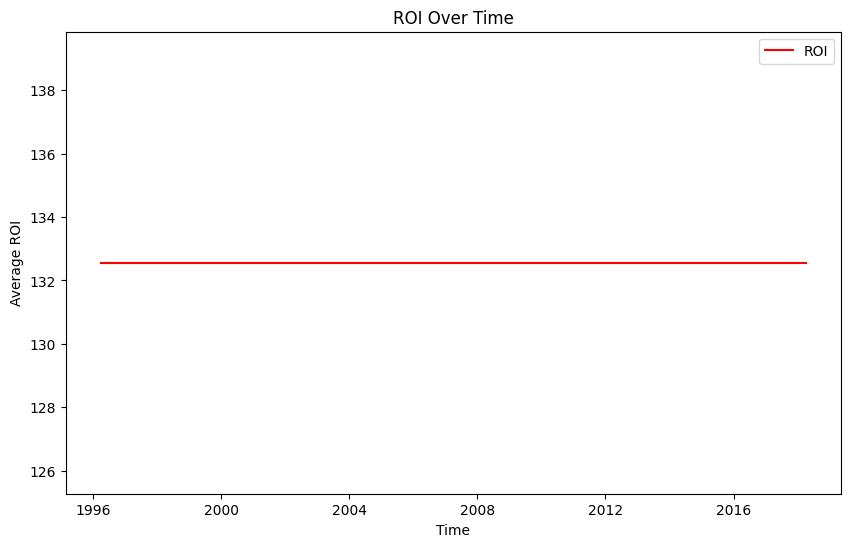

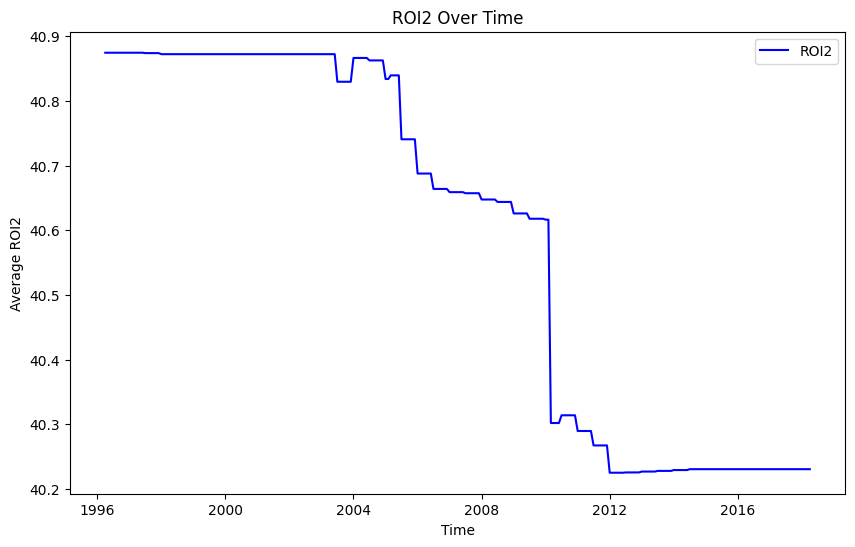

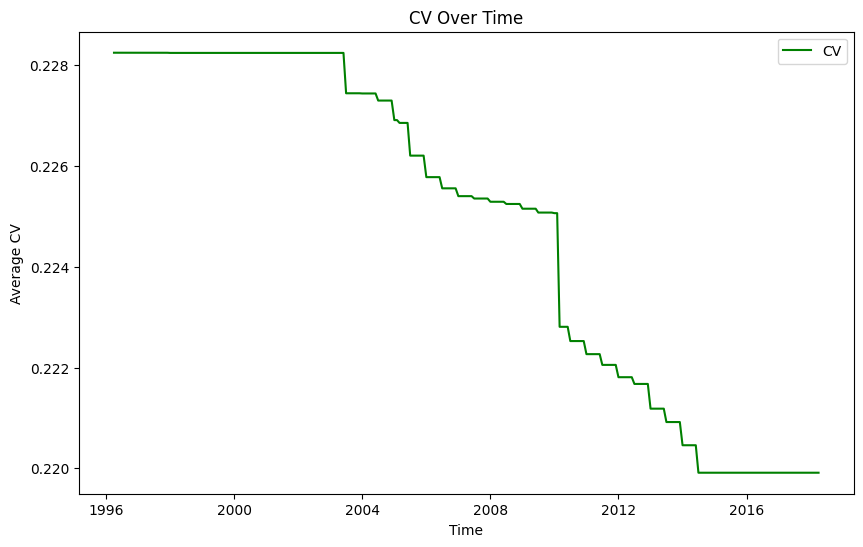

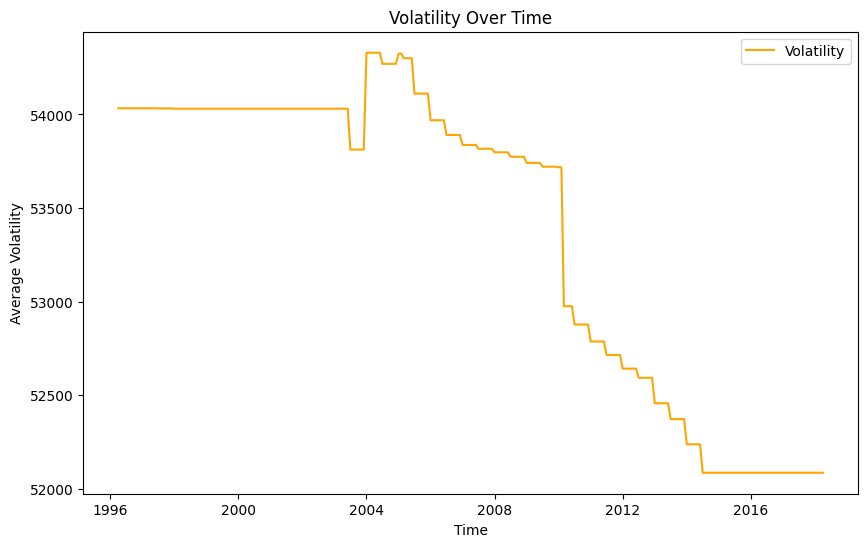

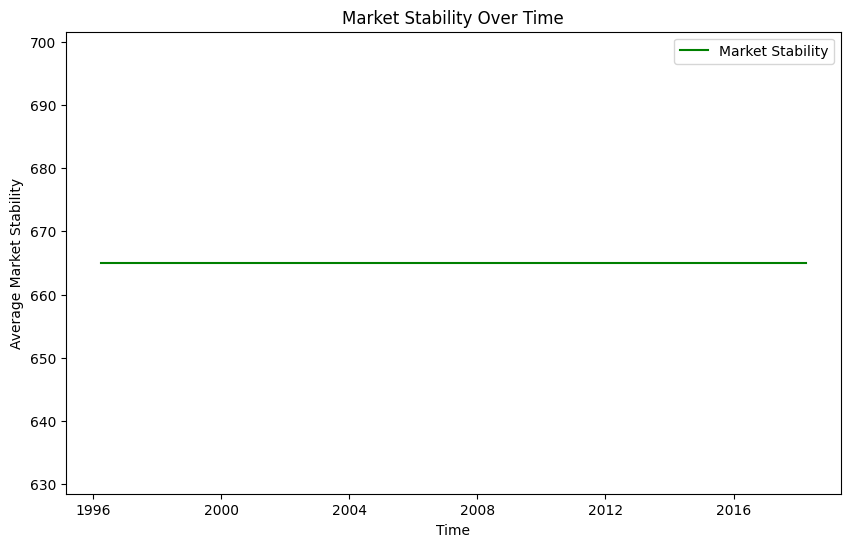

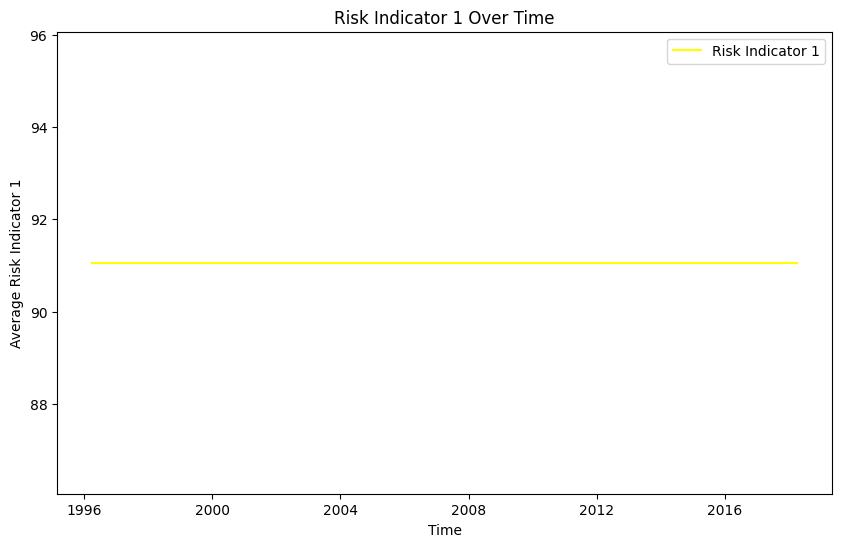

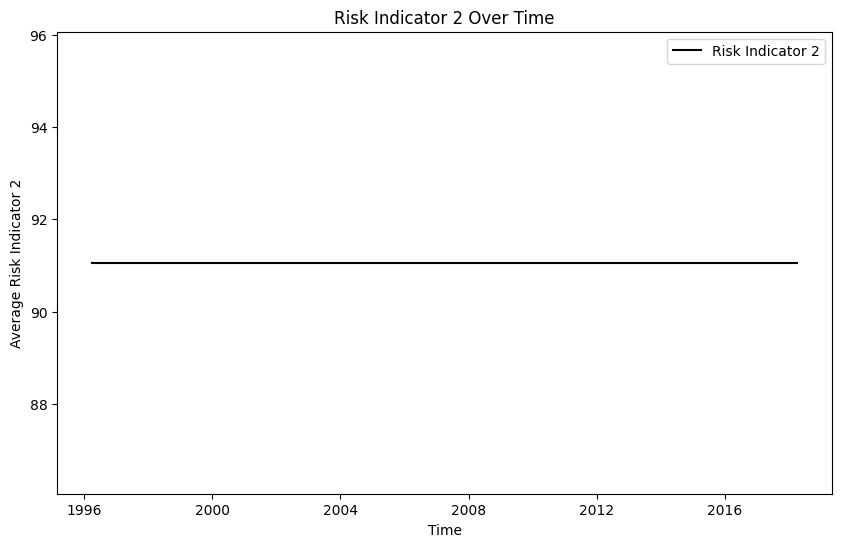

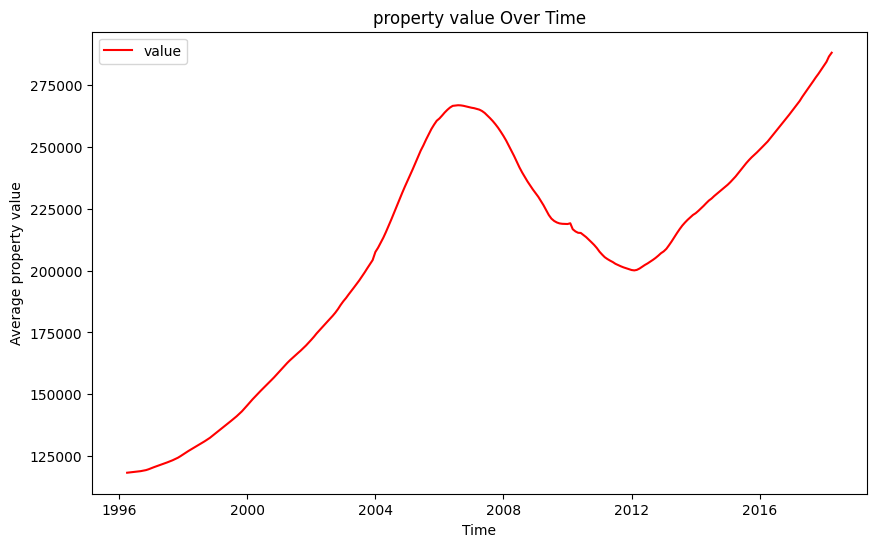

In [60]:
def plot_roi(data):
    avg_roi = new.groupby('time')['ROI'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_roi.index, avg_roi, label='ROI', color='red')
    plt.title('ROI Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average ROI')
    plt.legend()
    plt.show()

def plot_roi2(data):
    avg_roi2 = new.groupby('time')['ROI2'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_roi2.index, avg_roi2, label='ROI2', color='blue')
    plt.title('ROI2 Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average ROI2')
    plt.legend()
    plt.show()

# Add similar functions for other plots (CV, Volatility, Market Stability, Risk Indicator 1, Risk Indicator 2, Property Value)

# Example functions for CV and Volatility
def plot_cv(data):
    avg_cv = new.groupby('time')['CV'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_cv.index, avg_cv, label='CV', color='green')
    plt.title('CV Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average CV')
    plt.legend()
    plt.show()

def plot_volatility(data):
    avg_volatility = new.groupby('time')['Volatility'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_volatility.index, avg_volatility, label='Volatility', color='orange')
    plt.title('Volatility Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Volatility')
    plt.legend()
    plt.show()

def plot_Market_Stability(data):
    avg_Market_Stability = new.groupby('time')['Market Stability'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_Market_Stability.index, avg_Market_Stability, label='Market Stability', color='green')
    plt.title('Market Stability Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Market Stability')
    plt.legend()
    plt.show()    

def plot_Risk_Indicator_1(data):
    avg_Risk_Indicator_1 = new.groupby('time')['Risk Indicator 1'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_Risk_Indicator_1.index, avg_Risk_Indicator_1, label='Risk Indicator 1', color='yellow')
    plt.title('Risk Indicator 1 Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Risk Indicator 1')
    plt.legend()
    plt.show() 

def plot_Risk_Indicator_2(data):
    avg_Risk_Indicator_2 = new.groupby('time')['Risk Indicator 2'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_Risk_Indicator_2.index, avg_Risk_Indicator_2, label='Risk Indicator 2', color='black')
    plt.title('Risk Indicator 2 Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Risk Indicator 2')
    plt.legend()
    plt.show() 

def plot_value(data):
    avg_value = new.groupby('time')['value'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_value.index, avg_value, label='value', color='red')
    plt.title('property value Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average property value')
    plt.legend()
    plt.show() 
  
# Call the respective functions to generate the plots
plot_roi(data)
plot_roi2(data)
plot_cv(data)
plot_volatility(data)
plot_Market_Stability(data)
plot_Risk_Indicator_1(data)
plot_Risk_Indicator_2(data)
plot_value(data)
# Call the remaining functions for other plots (Market Stability, Risk Indicator 1, Risk Indicator 2, Property Value)

* From the graph above we see an average property value increase from 1996 to 2007, where it drastically dropped to 2012 and increased from 2012 onward. 

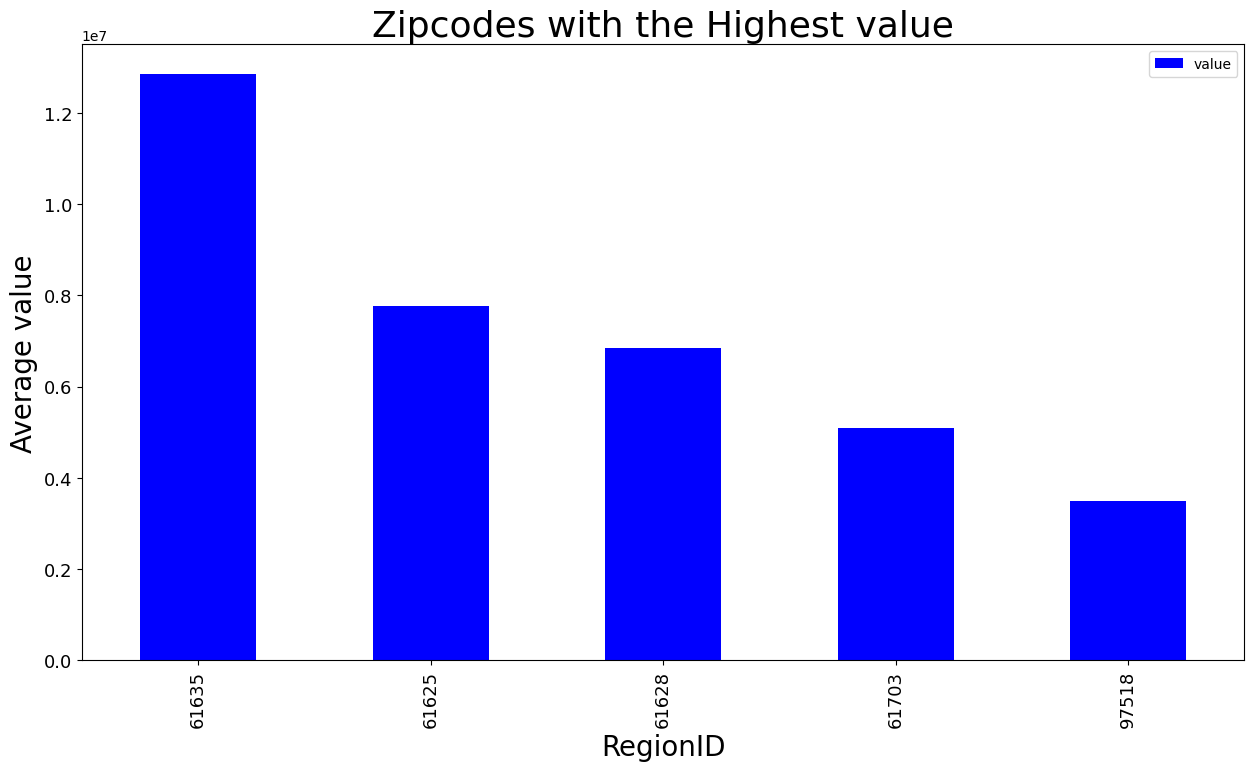

In [61]:
# Visualizing top five Region ID with highest price value
CV_topzip = pd.DataFrame(new.groupby('RegionID')['value'].mean().sort_values(ascending=False).head(5))
ax3 = CV_topzip.plot(kind='bar', figsize=(15,8), color='blue', fontsize=13);
ax3.set_alpha(0.8)

ax3.set_title("Zipcodes with the Highest value", fontsize=26)
ax3.set_ylabel("Average value", fontsize=20);
ax3.set_xlabel("RegionID", fontsize=20);

* The graph displays the top five zip codes with the highest average property values, indicating areas of potential real estate investment. These zip codes represent regions with strong property demand and potential for property value appreciation hence prospective buyers should consider these zip codes appealing for their investment in high-value properties.

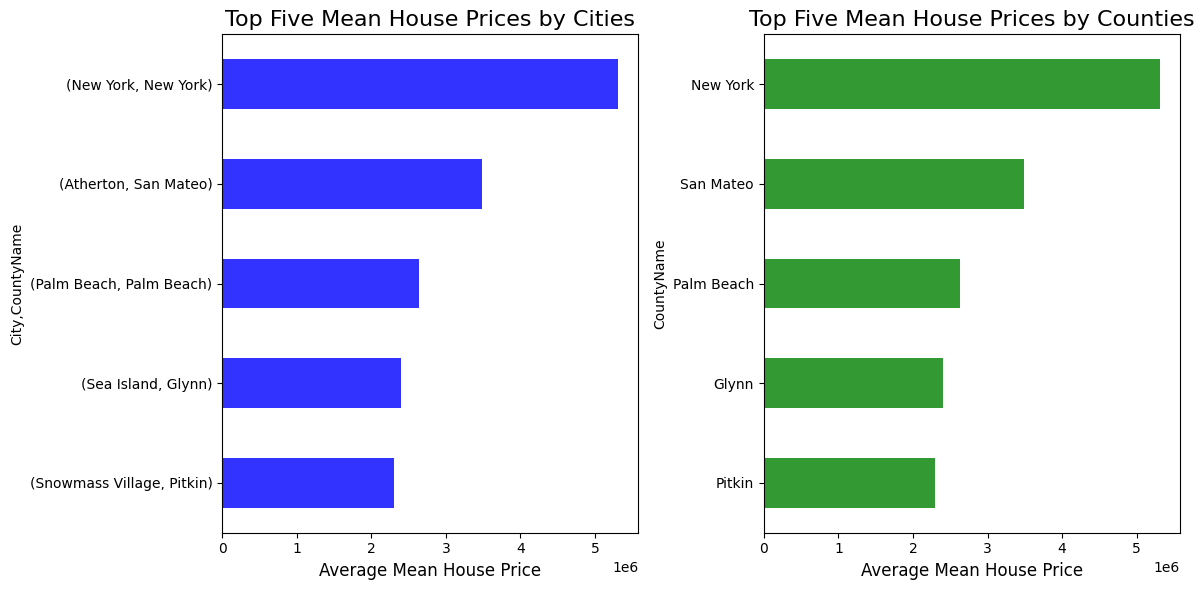

In [62]:
#visualizing the house prices basing on cities 
# Group data by city and county and calculate mean house prices
top_cities = new.groupby(['City', 'CountyName'])['value'].mean().sort_values(ascending=False).head(5)

# Sort the top cities and counties
top_cities = top_cities.sort_values(ascending=True)
top_counties = top_cities.groupby('CountyName').mean().sort_values(ascending=True)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for cities
top_cities.plot(kind='barh', color='blue', alpha=0.8, ax=axs[0])
axs[0].set_title("Top Five Mean House Prices by Cities", fontsize=16)
axs[0].set_xlabel("Average Mean House Price", fontsize=12)
axs[0].tick_params(axis='y', labelrotation=0)
axs[0].tick_params(axis='both', labelsize=10)

# Plot for counties
top_counties.plot(kind='barh', color='green', alpha=0.8, ax=axs[1])
axs[1].set_title("Top Five Mean House Prices by Counties", fontsize=16)
axs[1].set_xlabel("Average Mean House Price", fontsize=12)
axs[1].tick_params(axis='y', labelrotation=0)
axs[1].tick_params(axis='both', labelsize=10)

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()




* The visual above reveals the top five cities with the highest average mean house prices and the top five counties with the highest average mean house prices. This information helps identify the areas where housing prices are the highest, providing valuable insights for buyers and investors.

### Question 3: What are the key factors that influence real estate prices in each zip code?

### Question 4: How do different zip codes compare in terms of risk and return on investment?

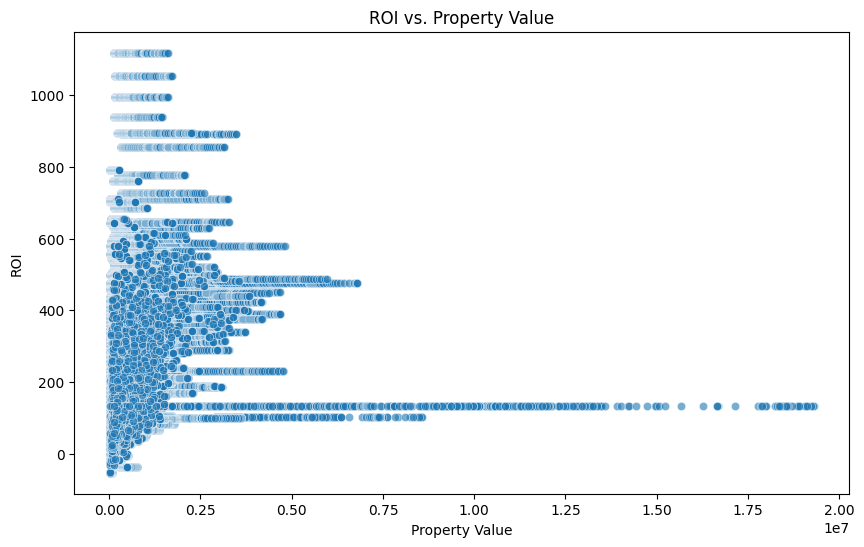

In [63]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='ROI', data=new, alpha=0.6)
plt.xlabel('Property Value')
plt.ylabel('ROI')
plt.title('ROI vs. Property Value')
plt.show()



### Time Series

* In order to prepare the data for the modeling process, we decided to drop the columns that would not be necessary for the modeling process and remain with the pricipal feature(time) together with the target feature(value).

* We are also going to format the time index column to represent a different frequency, that is, months. This is done to try and reduce the number or row entries in the datset.

> Time series data is observed at different points in time and can be used to forecast future values based on past observations. ARIMA (AutoRegressive Integrated Moving Average) is a commonly used model for time series forecasting. It incorporates parameters like p (auto-regressive), d (integrated), and q (moving average) to capture seasonality, trend, and noise in the data. If the time series has a seasonal component, a seasonal ARIMA model (SARIMA) is used with additional parameters P, D, and Q.

In [64]:
# Dropping columns
time_series = new.drop(['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'ROI2', 'CV', 'Volatility', 'Market Stability', 'Risk Indicator 1', 'Risk Indicator 2'], axis=1)
time_series

,value
time,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


In [65]:
# Changing the frequency of the time period
# Resample the data based on months and calculate the mean of each month
monthly_time_series = time_series.resample('M').mean()
monthly_time_series

,value
time,
1996-04-30,118299.123063
1996-05-31,118419.044139
1996-06-30,118537.423268
1996-07-31,118653.069278
1996-08-31,118780.254312
...,...
2017-12-31,281095.320247
2018-01-31,282657.060382
2018-02-28,284368.688447


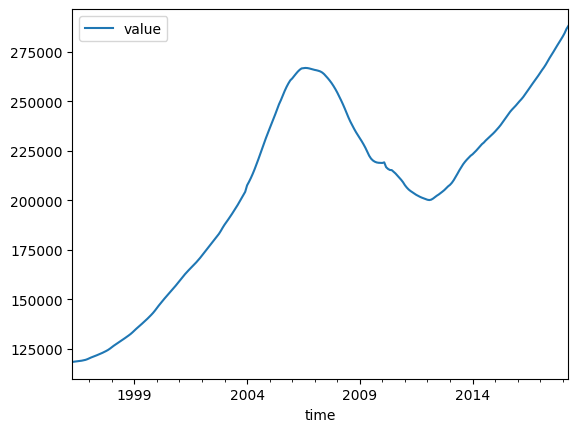

In [66]:
monthly_time_series.plot();

##### **Checking for Stationarity**

In [70]:
# Perform the ADF test
result = adfuller(time_series)

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the results
print(f"Test statistic: {test_statistic}")
print(f"P-value: {p_value}")

# Check if the time series is stationary based on the p-value
if p_value <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

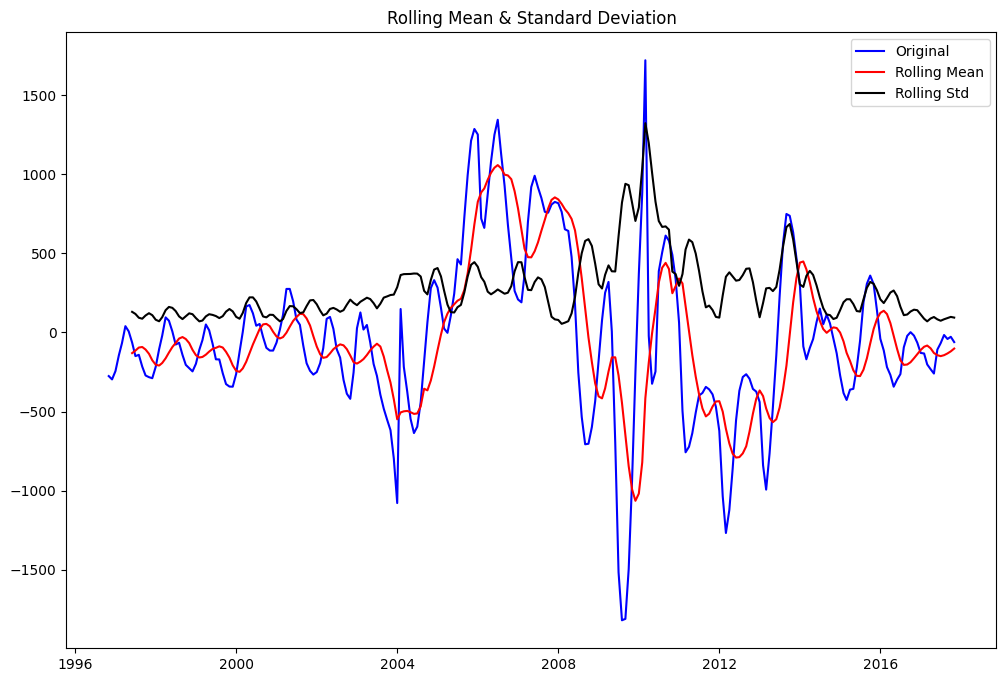

Results of Dickey-Fuller Test: 

Test Statistic                  -3.132203
p-value                          0.024260
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

The time series is likely stationary.


In [37]:
def stationarity_check(monthly_time_series):
    # Calculate rolling statistics
    roll_mean = monthly_time_series.rolling(window=8, center=False).mean()
    roll_std = monthly_time_series.rolling(window=8, center=False).std()
    # Perform the Dickey Fuller test
    dftest = adfuller(monthly_time_series)
    # Plot rolling statistics
    fig = plt.figure(figsize=(12,8))
    orig = plt.plot(monthly_time_series, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    # Extract the test statistic and p-value from the result
    test_statistic = dftest[0]
    p_value = dftest[1]
    # Check if the time series is stationary based on the p-value
    if p_value <= 0.05:
        print("\nThe time series is likely stationary.")
    else:
        print("\nThe time series is likely non-stationary.")
    return None

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Use the newly created function on the ts timeseries.
stationarity_check(ts_log_decompose)

In [ ]:
# Replace None with appropriate code
rolling_avg_ts = monthly_time_series.rolling(window=12).mean()

differenced_ts = monthly_time_series - rolling_avg_ts
differenced_ts.dropna(inplace=True)
differenced_transformed_ts = np.sqrt(monthly_time_series) - np.sqrt(rolling_avg_ts)
differenced_transformed_ts.dropna(inplace=True)

fig, axes = plt.subplots(ncols=3, figsize=(16,4))

axes[0].plot(monthly_time_series, color="gray", label="MOnthly Prices", )
axes[0].plot(rolling_avg_ts, color="blue", label="12-Month moving average")
axes[1].plot(differenced_ts, color="green", label="Differenced")
axes[2].plot(differenced_transformed_ts, label="Differenced and transformed")

locator = AutoDateLocator()
formatter = ConciseDateFormatter(locator)

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend()

In [ ]:
stationarity_check(ts_log_decompose)

##### **Seasonality**

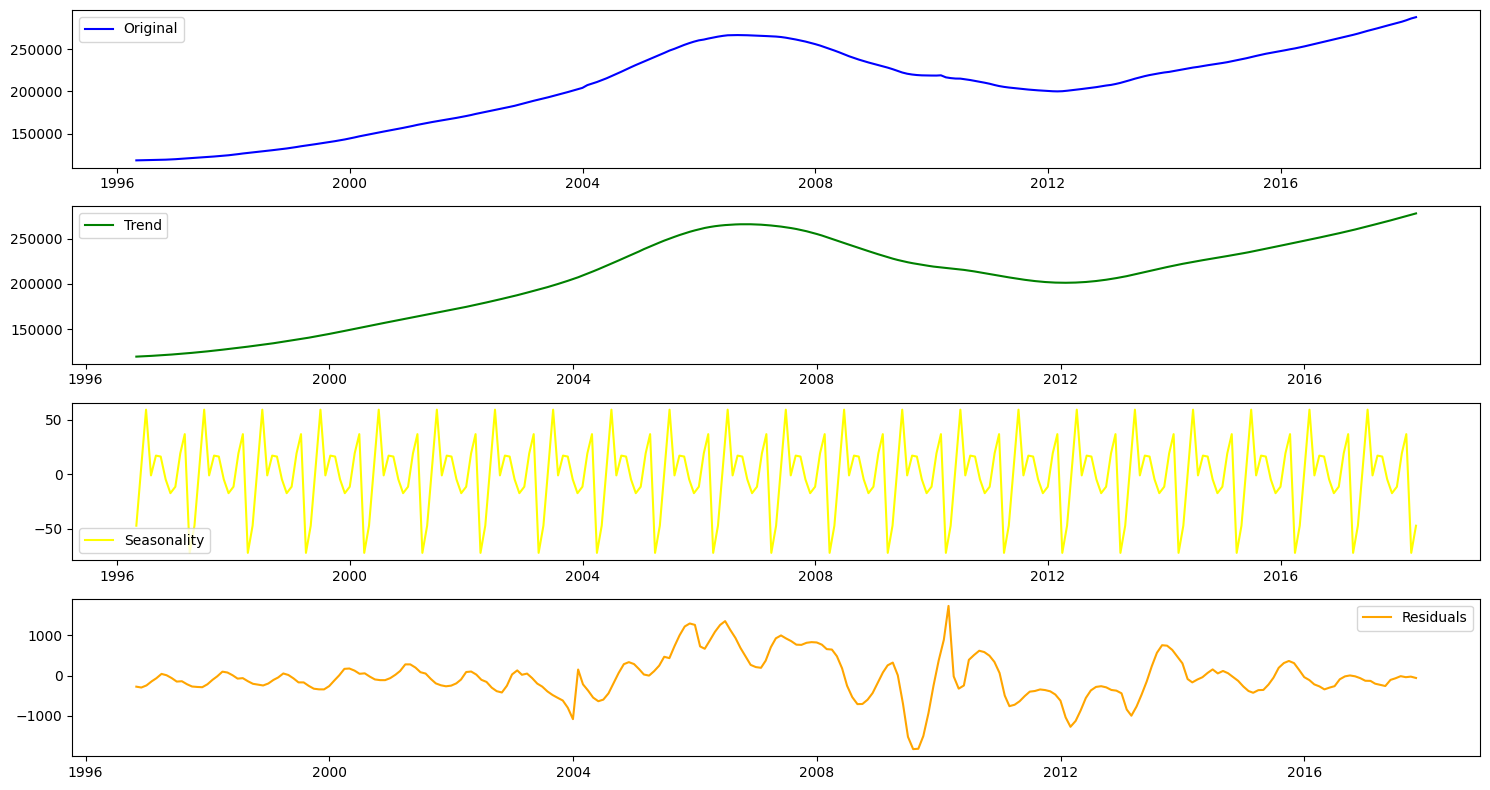

In [34]:
decomposition = sm.tsa.seasonal_decompose(monthly_time_series, model='additive')

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot the Trend, Seasonality, and Residuals
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(monthly_time_series, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='yellow')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='orange')
plt.legend(loc='best')
plt.tight_layout()

# Step 5: ARIMA Modeling

* In this section, our cleaned data will modeled to predict what may be a future trend. It is also assessed for any trends as well as seasonality.

# Step 6: Interpreting Results